# IMPORTING CLASSES/LIBRARIES 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics  import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler, FunctionTransformer, PowerTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from xgboost import XGBClassifier


# DATA EXTRACTION

#### IMPORTING DATA FROM CSV FILE

In [2]:
df=pd.read_csv('sydney_rain prediction.csv', header=0)

#### VIEWING FIRST FIVE ROWS

In [3]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2/1/2008   Sydney     19.5     22.4      15.6          6.2       0.0   
1  2/2/2008   Sydney     19.5     25.6       6.0          3.4       2.7   
2  2/3/2008   Sydney     21.6     24.5       6.6          2.4       0.1   
3  2/4/2008   Sydney     20.2     22.8      18.8          2.2       0.0   
4  2/5/2008   Sydney     19.7     25.7      77.4          NaN       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  
0     20.7     20.9       Yes          Yes  
1     22.4     24.8       Yes          Yes  
2     23.5     23.0       Yes          Yes  
3     21.4     20.9       Yes          Yes  
4     22.5     25.5       Yes          Yes

#### VIEWING THE DATATYPES AND COUNT OF NON-NULL VALUES

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


#### SUMMARY OF NUMERICAL COLUMNS

In [5]:
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  3334.000000  3335.000000  3331.000000  3286.000000  3321.000000   
mean     14.865057    23.002339     3.330231     5.187432     7.179374   
std       4.553641     4.494638     9.895172     2.777407     3.810886   
min       4.300000    11.700000     0.000000     0.000000     0.000000   
25%      11.000000    19.600000     0.000000     3.200000     4.300000   
50%      14.900000    22.800000     0.000000     4.800000     8.300000   
75%      18.700000    26.000000     1.400000     7.000000    10.200000   
max      27.600000    45.800000   119.400000    18.400000    13.600000   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count  3323.000000  3324.000000  3317.000000  3318.000000  2771.000000   
mean     68.229010    54.699158  1018.346156  1016.018774     4.181523   
std      15.085355    16.293530     7.021571     7.032211     2.749578   
min      19.000000    10.000000   986.700000   989.800000     0.000000   
25%      58.000000    44.000000  1013.700000  1011.300000     1.000000   
50%      69.000000    56.000000  1018.600000  1016.300000     5.000000   
75%      80.000000    65.000000  1023.100000  1020.800000     7.000000   
max     100.000000    99.000000  1039.000000  1036.700000     9.000000   

          Cloud3pm      Temp9am      Temp3pm  
count  2776.000000  3333.000000  3333.000000  
mean      4.218660    17.819742    21.533333  
std       2.641885     4.897177     4.303737  
min       0.000000     6.400000    10.200000  
25%       1.000000    13.800000    18.400000  
50%       4.000000    18.200000    21.300000  
75%       7.000000    21.700000    24.500000  
max       8.000000    36.500000    44.700000

# FEATURE ENGINEERING (CLEANING/TRANSFORMATION/REDUCTION ETC.)

#### CHANGING THE DATATYPE OF DATE COLUMNS AND EXTRACTING USEFUL FEATURES

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['day_of_year'] = df['Date'].dt.dayofyear
df['date_week'] = df['Date'].dt.isocalendar().week

#### DROPPING USELESS FEATURES

In [7]:
df.drop(columns=['Location', 'Date'], inplace=True)

#### VIEWING THE SHAPE(ROWS, COLUMNS) OF OUR DATA

In [8]:
df.shape

(3337, 18)

#### FINDING MISSING VALUES 

In [9]:
df.isnull().sum()

MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
year              0
day_of_year       0
date_week         0
dtype: int64

#### PERCENTAGE OF MISSING VALUES

In [10]:
df.isnull().mean()*100

MinTemp          0.089901
MaxTemp          0.059934
Rainfall         0.179802
Evaporation      1.528319
Sunshine         0.479473
Humidity9am      0.419539
Humidity3pm      0.389571
Pressure9am      0.599341
Pressure3pm      0.569374
Cloud9am        16.961343
Cloud3pm        16.811507
Temp9am          0.119868
Temp3pm          0.119868
RainToday        0.179802
RainTomorrow     0.000000
year             0.000000
day_of_year      0.000000
date_week        0.000000
dtype: float64

In [11]:
# PERCENTAGE OF DATA LOSS IF NULL VALUES WERE DROPPED WHICH IS AROUND 19%. 

new_df=df.dropna()
(df.shape[0]-new_df.shape[0])/df.shape[0]*100

19.778243931675156

#### ONE HOT ENCODING THE CATEGORICAL COLUMNS

In [12]:
# THE SAME THING CAN BE DONE USING SK-LEARN class sklearn.preprocessing.OneHotEncoder
# ALONG WITH COLUMN TRANSFORMER

df=pd.get_dummies(data=df, columns=['RainTomorrow', 'RainToday'] ,drop_first=True, dtype=int)

In [13]:
#VIEWING THE RANDOM SAMPLES

df.sample(5)

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
3315     10.5     19.7       1.4          0.6       6.8         77.0   
2906     17.3     24.5       0.0          3.4      10.5         79.0   
2602      8.0     19.2       3.0          0.6       7.7         94.0   
1967     11.3     22.0       0.0          7.0      11.0         49.0   
2293      7.9     17.0      19.4          3.6      10.1         77.0   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
3315         57.0       1028.3       1024.5       1.0       2.0     12.2   
2906         69.0       1023.1       1019.1       2.0       5.0     20.2   
2602         45.0       1029.6       1026.1       1.0       7.0      9.3   
1967         42.0       1014.8       1012.2       1.0       2.0     16.8   
2293         46.0       1033.3       1031.9       2.0       2.0     10.5   

      Temp3pm  year  day_of_year  date_week  RainTomorrow_Yes  RainToday_Yes  
3315     19.0  2017          155         22                 0              1  
2906     24.1  2016          112         16                 0              0  
2602     17.5  2015          173         26                 0              1  
1967     20.1  2013          264         38                 0              0  
2293     16.2  2014          225         33                 0              1

In [14]:
df.shape

(3337, 18)

#### PERFORMING UNIVARIATE ANALYSIS

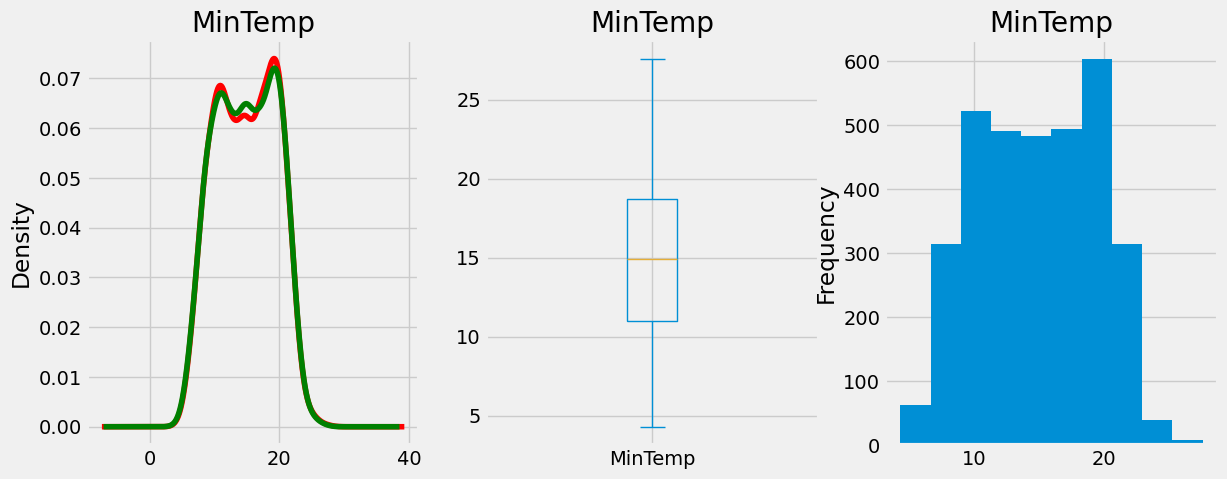

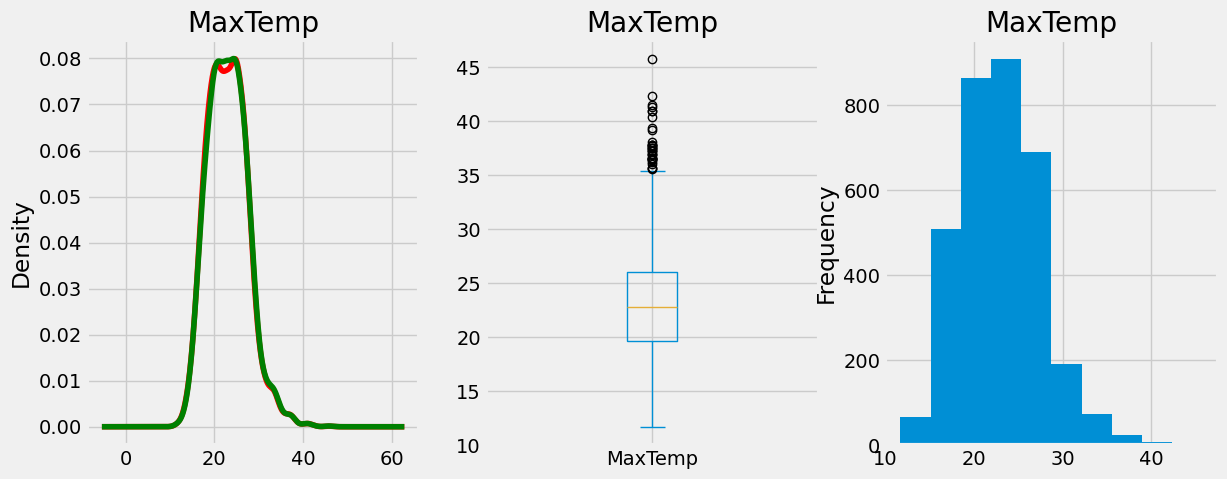

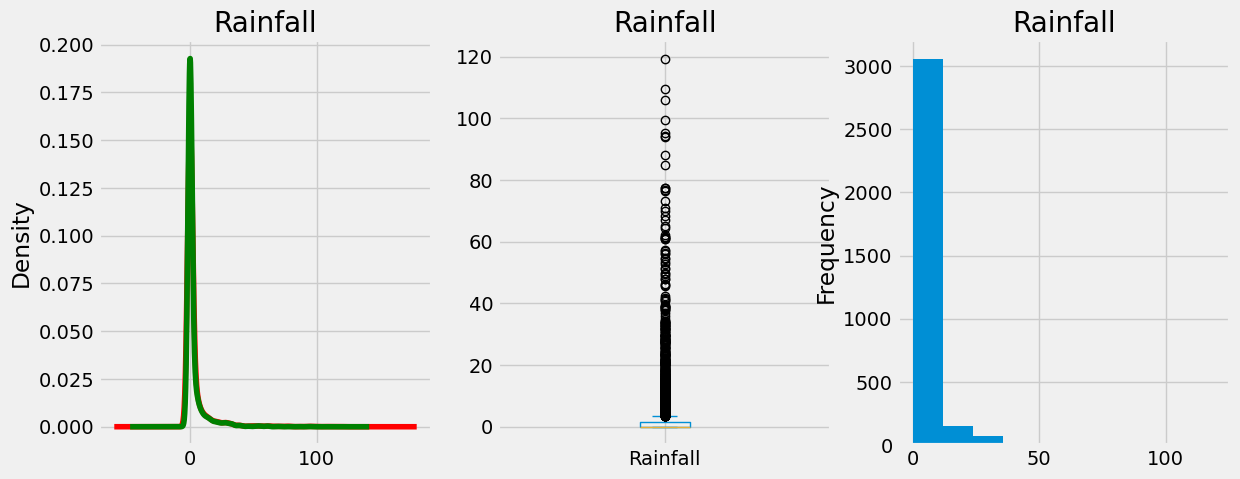

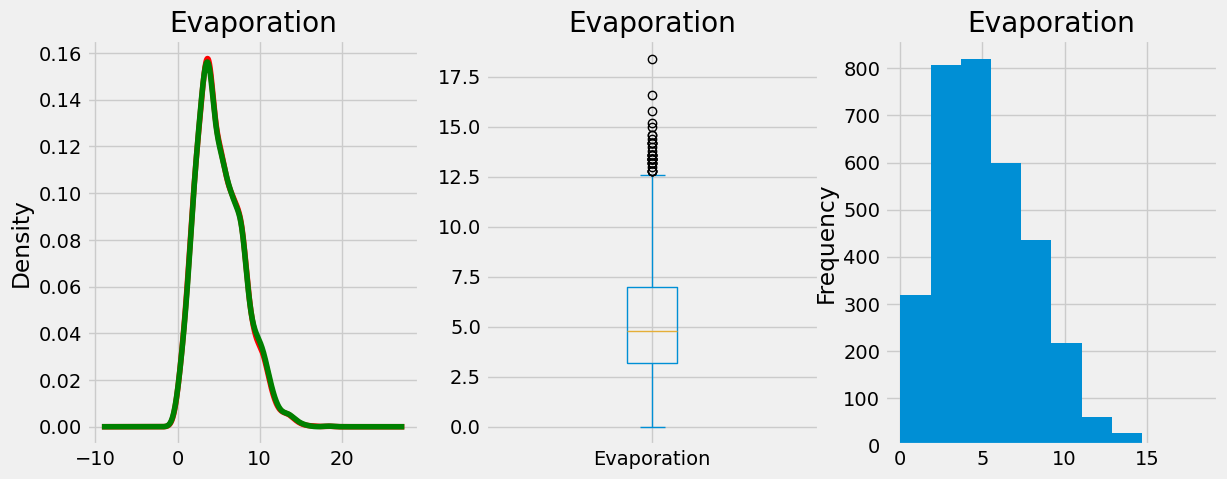

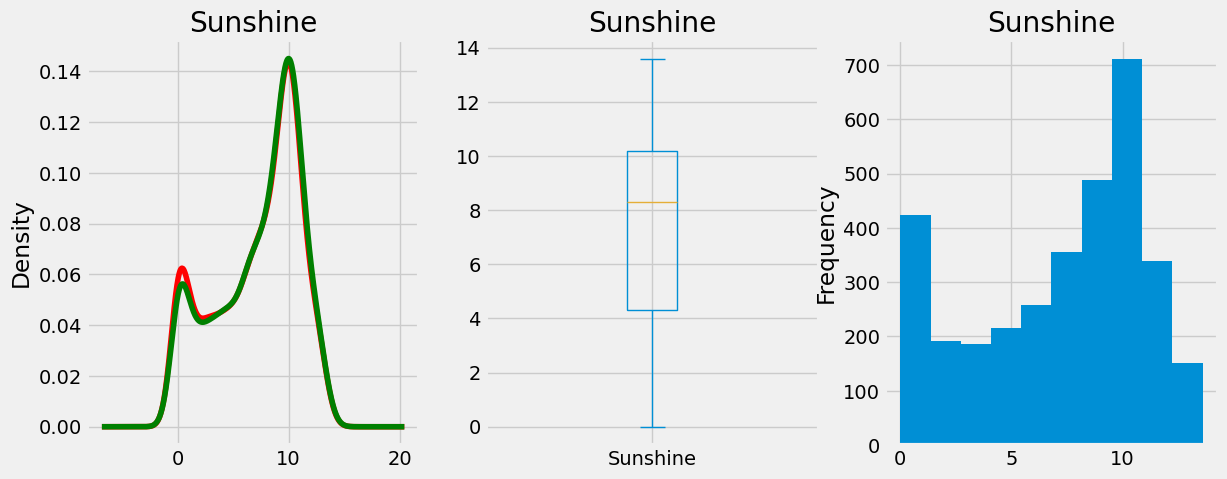

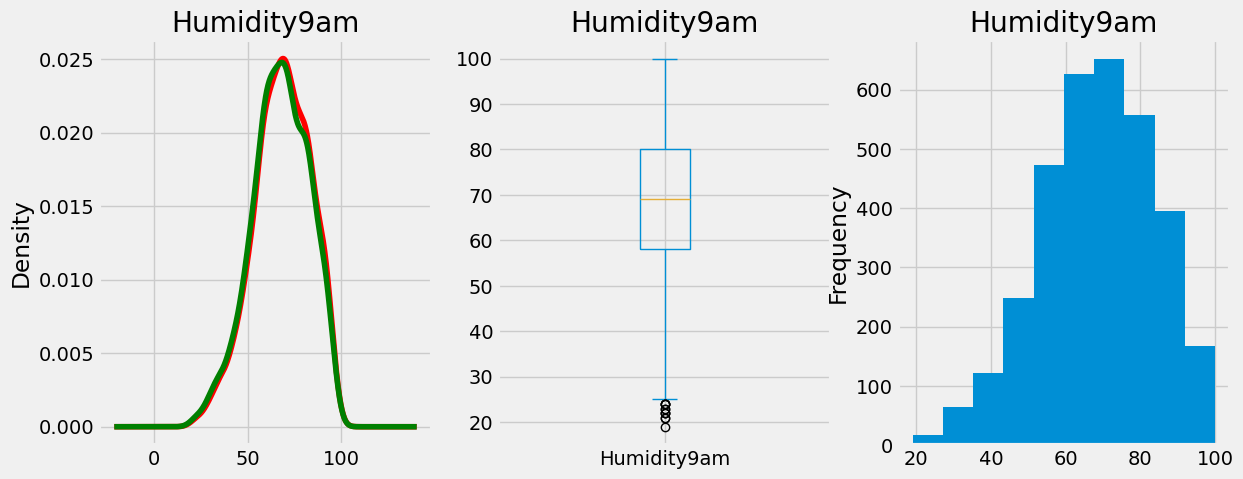

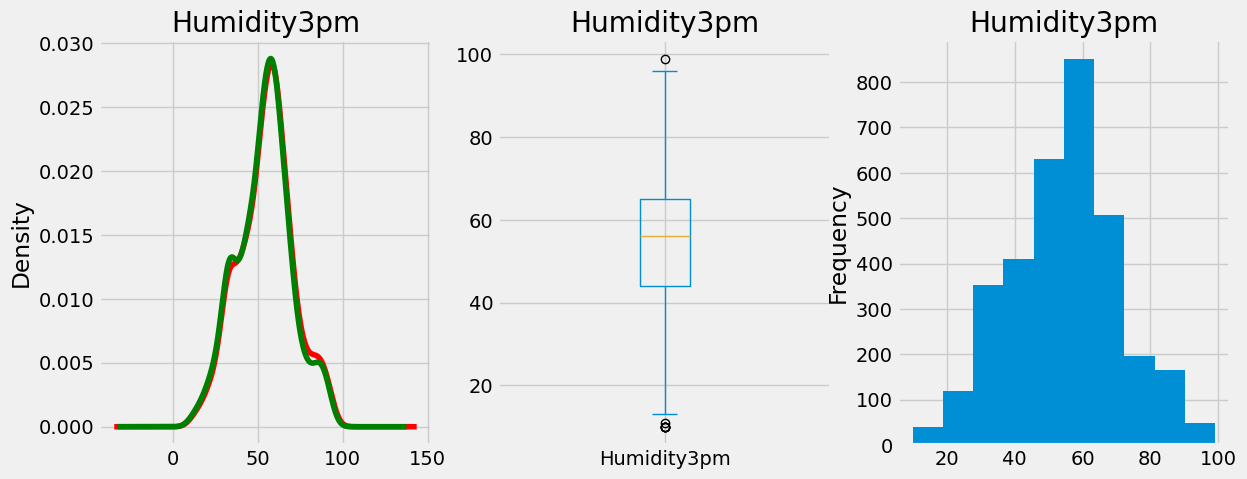

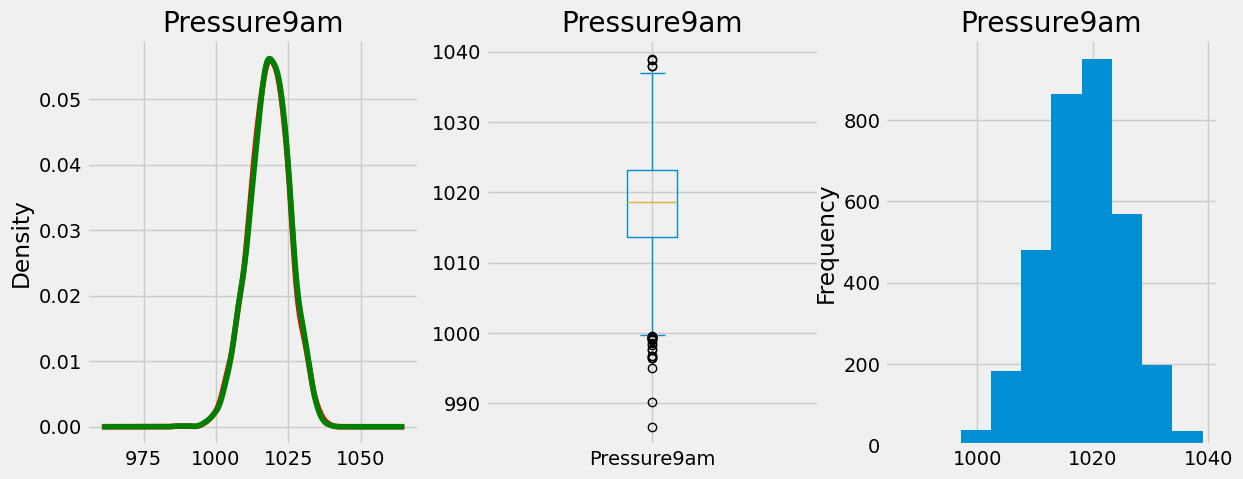

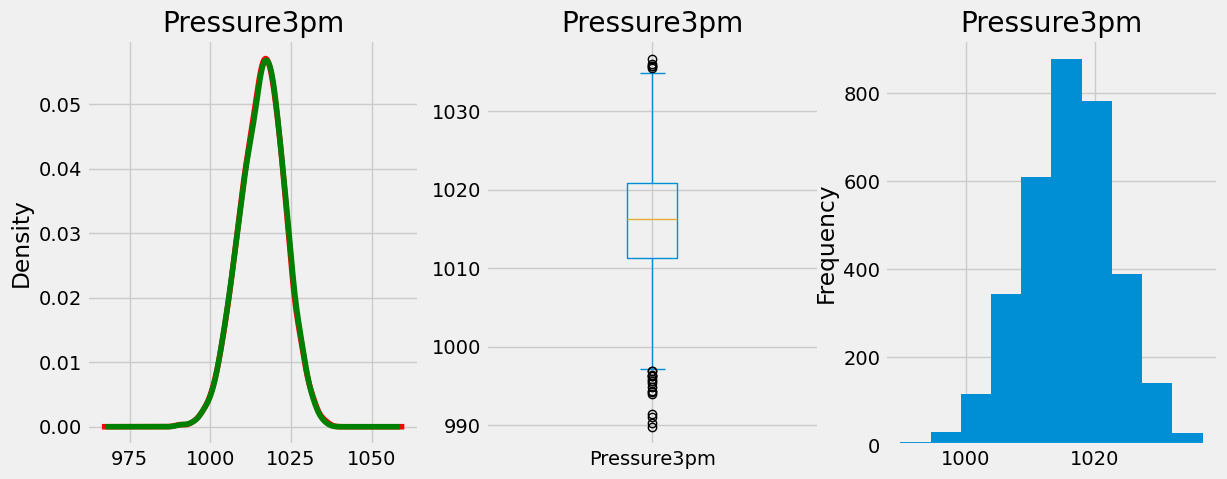

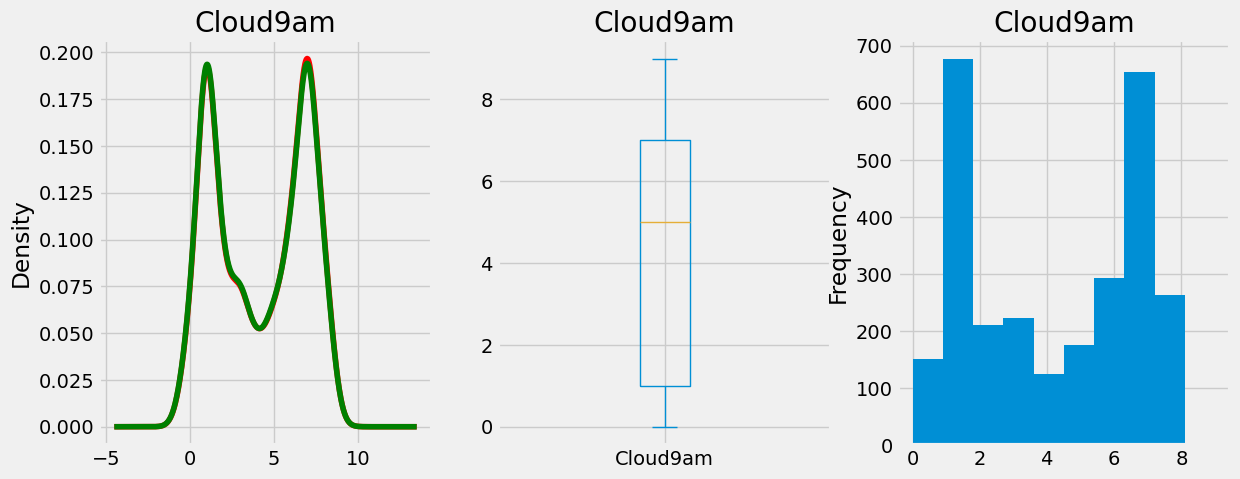

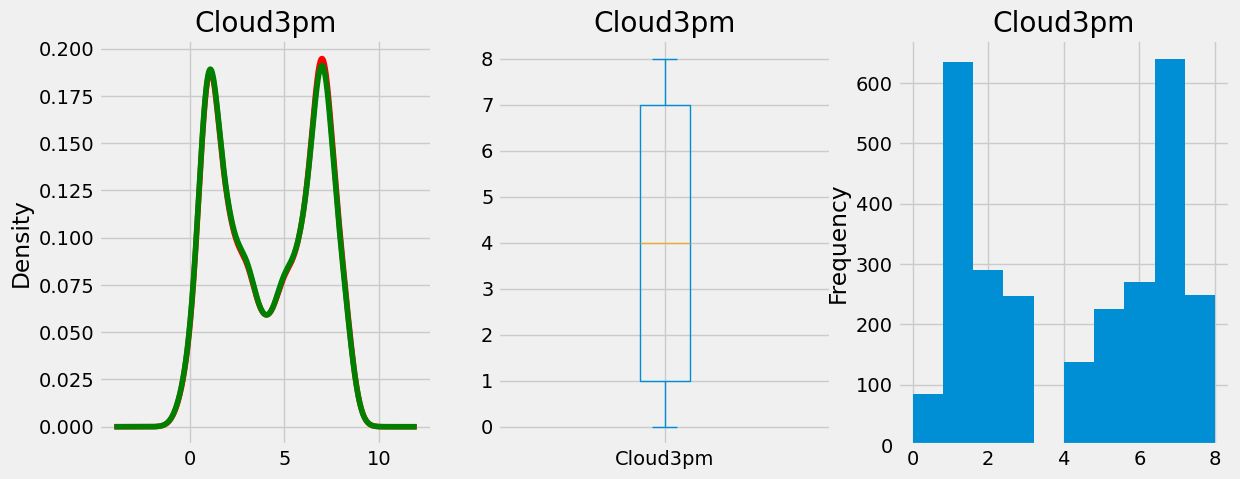

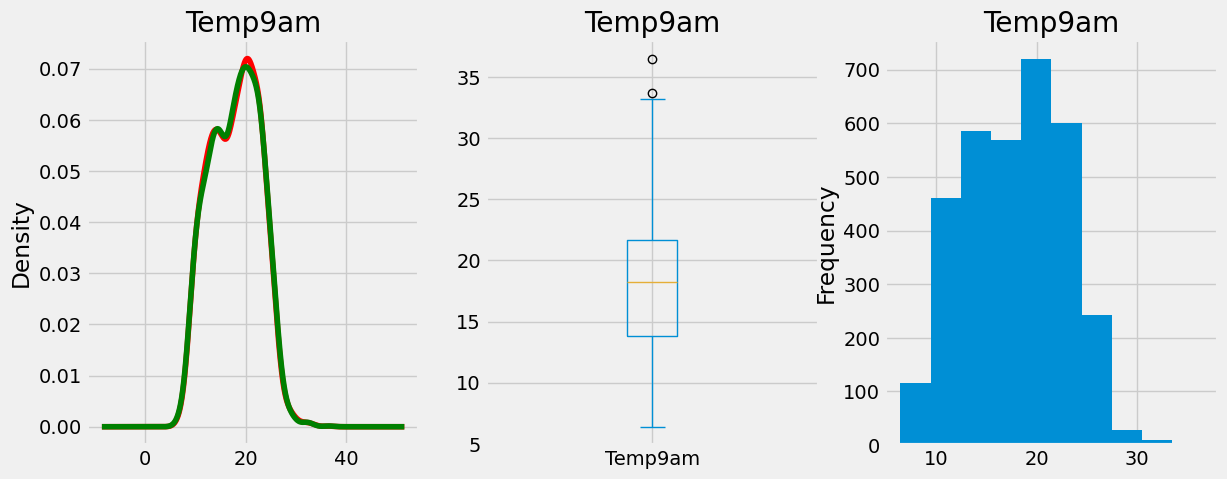

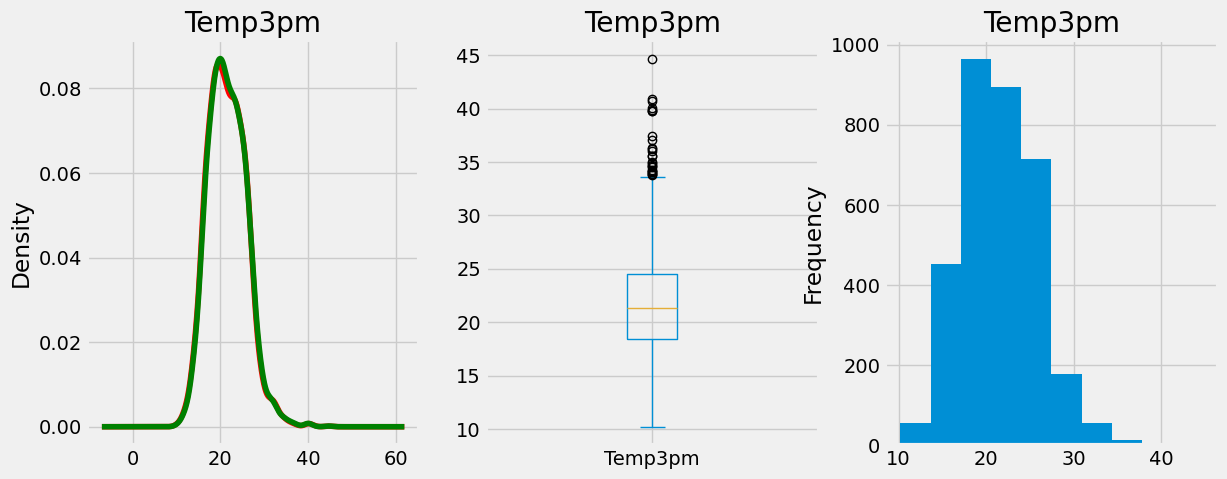

In [15]:
#FIRST FIGURE SHOWS THE COMPARASION WITH KDE(PROBABILITY DENSITY FUNCTION) BEFORE AND AFTER REMOVING NULL VALUES
#SECOND FIGURE SHOWS THE BOX PLOT OF EACH FEATURE
#THIRD FIGURE SHOWS THE HISTOGRAM OF EACH FEATURE
#THESE FIGURE WILL SHOW, WHETHER REMOVING THE MISSING VALUE IS SAFE OR NOT AND ALOS HELPS IN FINDING THE OUTLIERS
#THESE WILL HELP US TO FIND THE SKEWNESS AND DISTRIBUTION OF EACH FEATURE
#TRIMMING THE MISSING DATA IS NOT SAFE AS MISSING IS NOT COMPLETELY AT RANDOM, THERE IS A CHANGE IN KDE BEFORE AND AFTER REMOVAL

plt.style.use('fivethirtyeight')
new_df=df.dropna()
for i in df.columns.tolist()[:13]:
    fig=plt.figure(figsize=(13,5))
    ax=fig.add_subplot(131)
    df[i].plot(kind='kde', ax=ax, title=i, color='red' )
    new_df[i].plot(kind='kde', ax=ax, color='green', title=i)

    ax=fig.add_subplot(132)
    df[i].plot(kind='box', title=i)

    ax=fig.add_subplot(133)
    df[i].plot(kind='hist', title=i) 

#### FINDING THE SKEWNESS USING PANDAS SKEW() FUNCTION

In [16]:
#SOME FEATURES SHOWS SKEWNESS

df.skew()

MinTemp            -0.026352
MaxTemp             0.508623
Rainfall            5.366321
Evaporation         0.650527
Sunshine           -0.539774
Humidity9am        -0.350818
Humidity3pm        -0.016015
Pressure9am        -0.175641
Pressure3pm        -0.167181
Cloud9am           -0.071495
Cloud3pm           -0.045788
Temp9am            -0.007459
Temp3pm             0.462252
year                0.013064
day_of_year          0.04261
date_week           0.043066
RainTomorrow_Yes    1.099459
RainToday_Yes       1.097678
dtype: Float64

#### CORRELATION ANALYSIS

In [17]:
#SOME FEATUES ARE NOT SUFFICIENTLY CORRELATED WITH RainTomorrow_Yes, WHCIH WILL BE TREATED IN LATER PART OF THE PROCESS
df.corr()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp           1.000000  0.770893  0.012883     0.571257 -0.063154   
MaxTemp           0.770893  1.000000 -0.140107     0.513138  0.326683   
Rainfall          0.012883 -0.140107  1.000000    -0.126143 -0.308044   
Evaporation       0.571257  0.513138 -0.126143     1.000000  0.177628   
Sunshine         -0.063154  0.326683 -0.308044     0.177628  1.000000   
Humidity9am       0.052490 -0.187437  0.331045    -0.399019 -0.490967   
Humidity3pm       0.271686 -0.152615  0.301681    -0.103246 -0.585736   
Pressure9am      -0.393827 -0.389088 -0.037051    -0.349421 -0.046654   
Pressure3pm      -0.356406 -0.425169  0.003216    -0.303330 -0.094841   
Cloud9am          0.260508 -0.095859  0.277427    -0.041160 -0.734302   
Cloud3pm          0.180094 -0.108426  0.229576    -0.041205 -0.751838   
Temp9am           0.939116  0.859346 -0.056061     0.608872  0.115135   
Temp3pm           0.752922  0.960457 -0.143698     0.477629  0.345139   
year              0.094164  0.135957  0.033770     0.074395  0.014759   
day_of_year      -0.262951 -0.184700 -0.069808     0.042995  0.083449   
date_week        -0.258803 -0.183517 -0.069933     0.044053  0.070908   
RainTomorrow_Yes  0.079975 -0.149285  0.294121    -0.065221 -0.523060   
RainToday_Yes     0.018700 -0.188354  0.555191    -0.232707 -0.368081   

                  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
MinTemp              0.052490     0.271686    -0.393827    -0.356406   
MaxTemp             -0.187437    -0.152615    -0.389088    -0.425169   
Rainfall             0.331045     0.301681    -0.037051     0.003216   
Evaporation         -0.399019    -0.103246    -0.349421    -0.303330   
Sunshine            -0.490967    -0.585736    -0.046654    -0.094841   
Humidity9am          1.000000     0.659194     0.263977     0.252360   
Humidity3pm          0.659194     1.000000     0.154908     0.183647   
Pressure9am          0.263977     0.154908     1.000000     0.963173   
Pressure3pm          0.252360     0.183647     0.963173     1.000000   
Cloud9am             0.459455     0.498119    -0.012196     0.020884   
Cloud3pm             0.359910     0.517755    -0.044233    -0.003187   
Temp9am             -0.148239     0.128818    -0.419440    -0.405047   
Temp3pm             -0.157598    -0.214047    -0.346731    -0.392653   
year                -0.086099    -0.062949     0.019500     0.016259   
day_of_year         -0.219731    -0.128914    -0.014279    -0.039502   
date_week           -0.215439    -0.125139    -0.009850    -0.033771   
RainTomorrow_Yes     0.329501     0.472105    -0.032536     0.011004   
RainToday_Yes        0.401350     0.343558    -0.000113     0.057121   

                  Cloud9am  Cloud3pm   Temp9am   Temp3pm      year  \
MinTemp           0.260508  0.180094  0.939116  0.752922  0.094164   
MaxTemp          -0.095859 -0.108426  0.859346  0.960457  0.135957   
Rainfall          0.277427  0.229576 -0.056061 -0.143698  0.033770   
Evaporation      -0.041160 -0.041205  0.608872  0.477629  0.074395   
Sunshine         -0.734302 -0.751838  0.115135  0.345139  0.014759   
Humidity9am       0.459455  0.359910 -0.148239 -0.157598 -0.086099   
Humidity3pm       0.498119  0.517755  0.128818 -0.214047 -0.062949   
Pressure9am      -0.012196 -0.044233 -0.419440 -0.346731  0.019500   
Pressure3pm       0.020884 -0.003187 -0.405047 -0.392653  0.016259   
Cloud9am          1.000000  0.609556  0.097135 -0.098202  0.030216   
Cloud3pm          0.609556  1.000000  0.074174 -0.159852 -0.000139   
Temp9am           0.097135  0.074174  1.000000  0.829095  0.098860   
Temp3pm          -0.098202 -0.159852  0.829095  1.000000  0.120584   
year              0.030216 -0.000139  0.098860  0.120584  1.000000   
day_of_year      -0.052196 -0.038051 -0.167245 -0.224720 -0.104136   
date_week        -0.035976 -0.020212 -0.163463 -0.223135 -0.101482   
RainTomorrow_Yes  0.364861  0.456955 -0.000721 -0.188991  0.001919   
Ra

#### PERFORMING BIVARIATE ANALYSIS

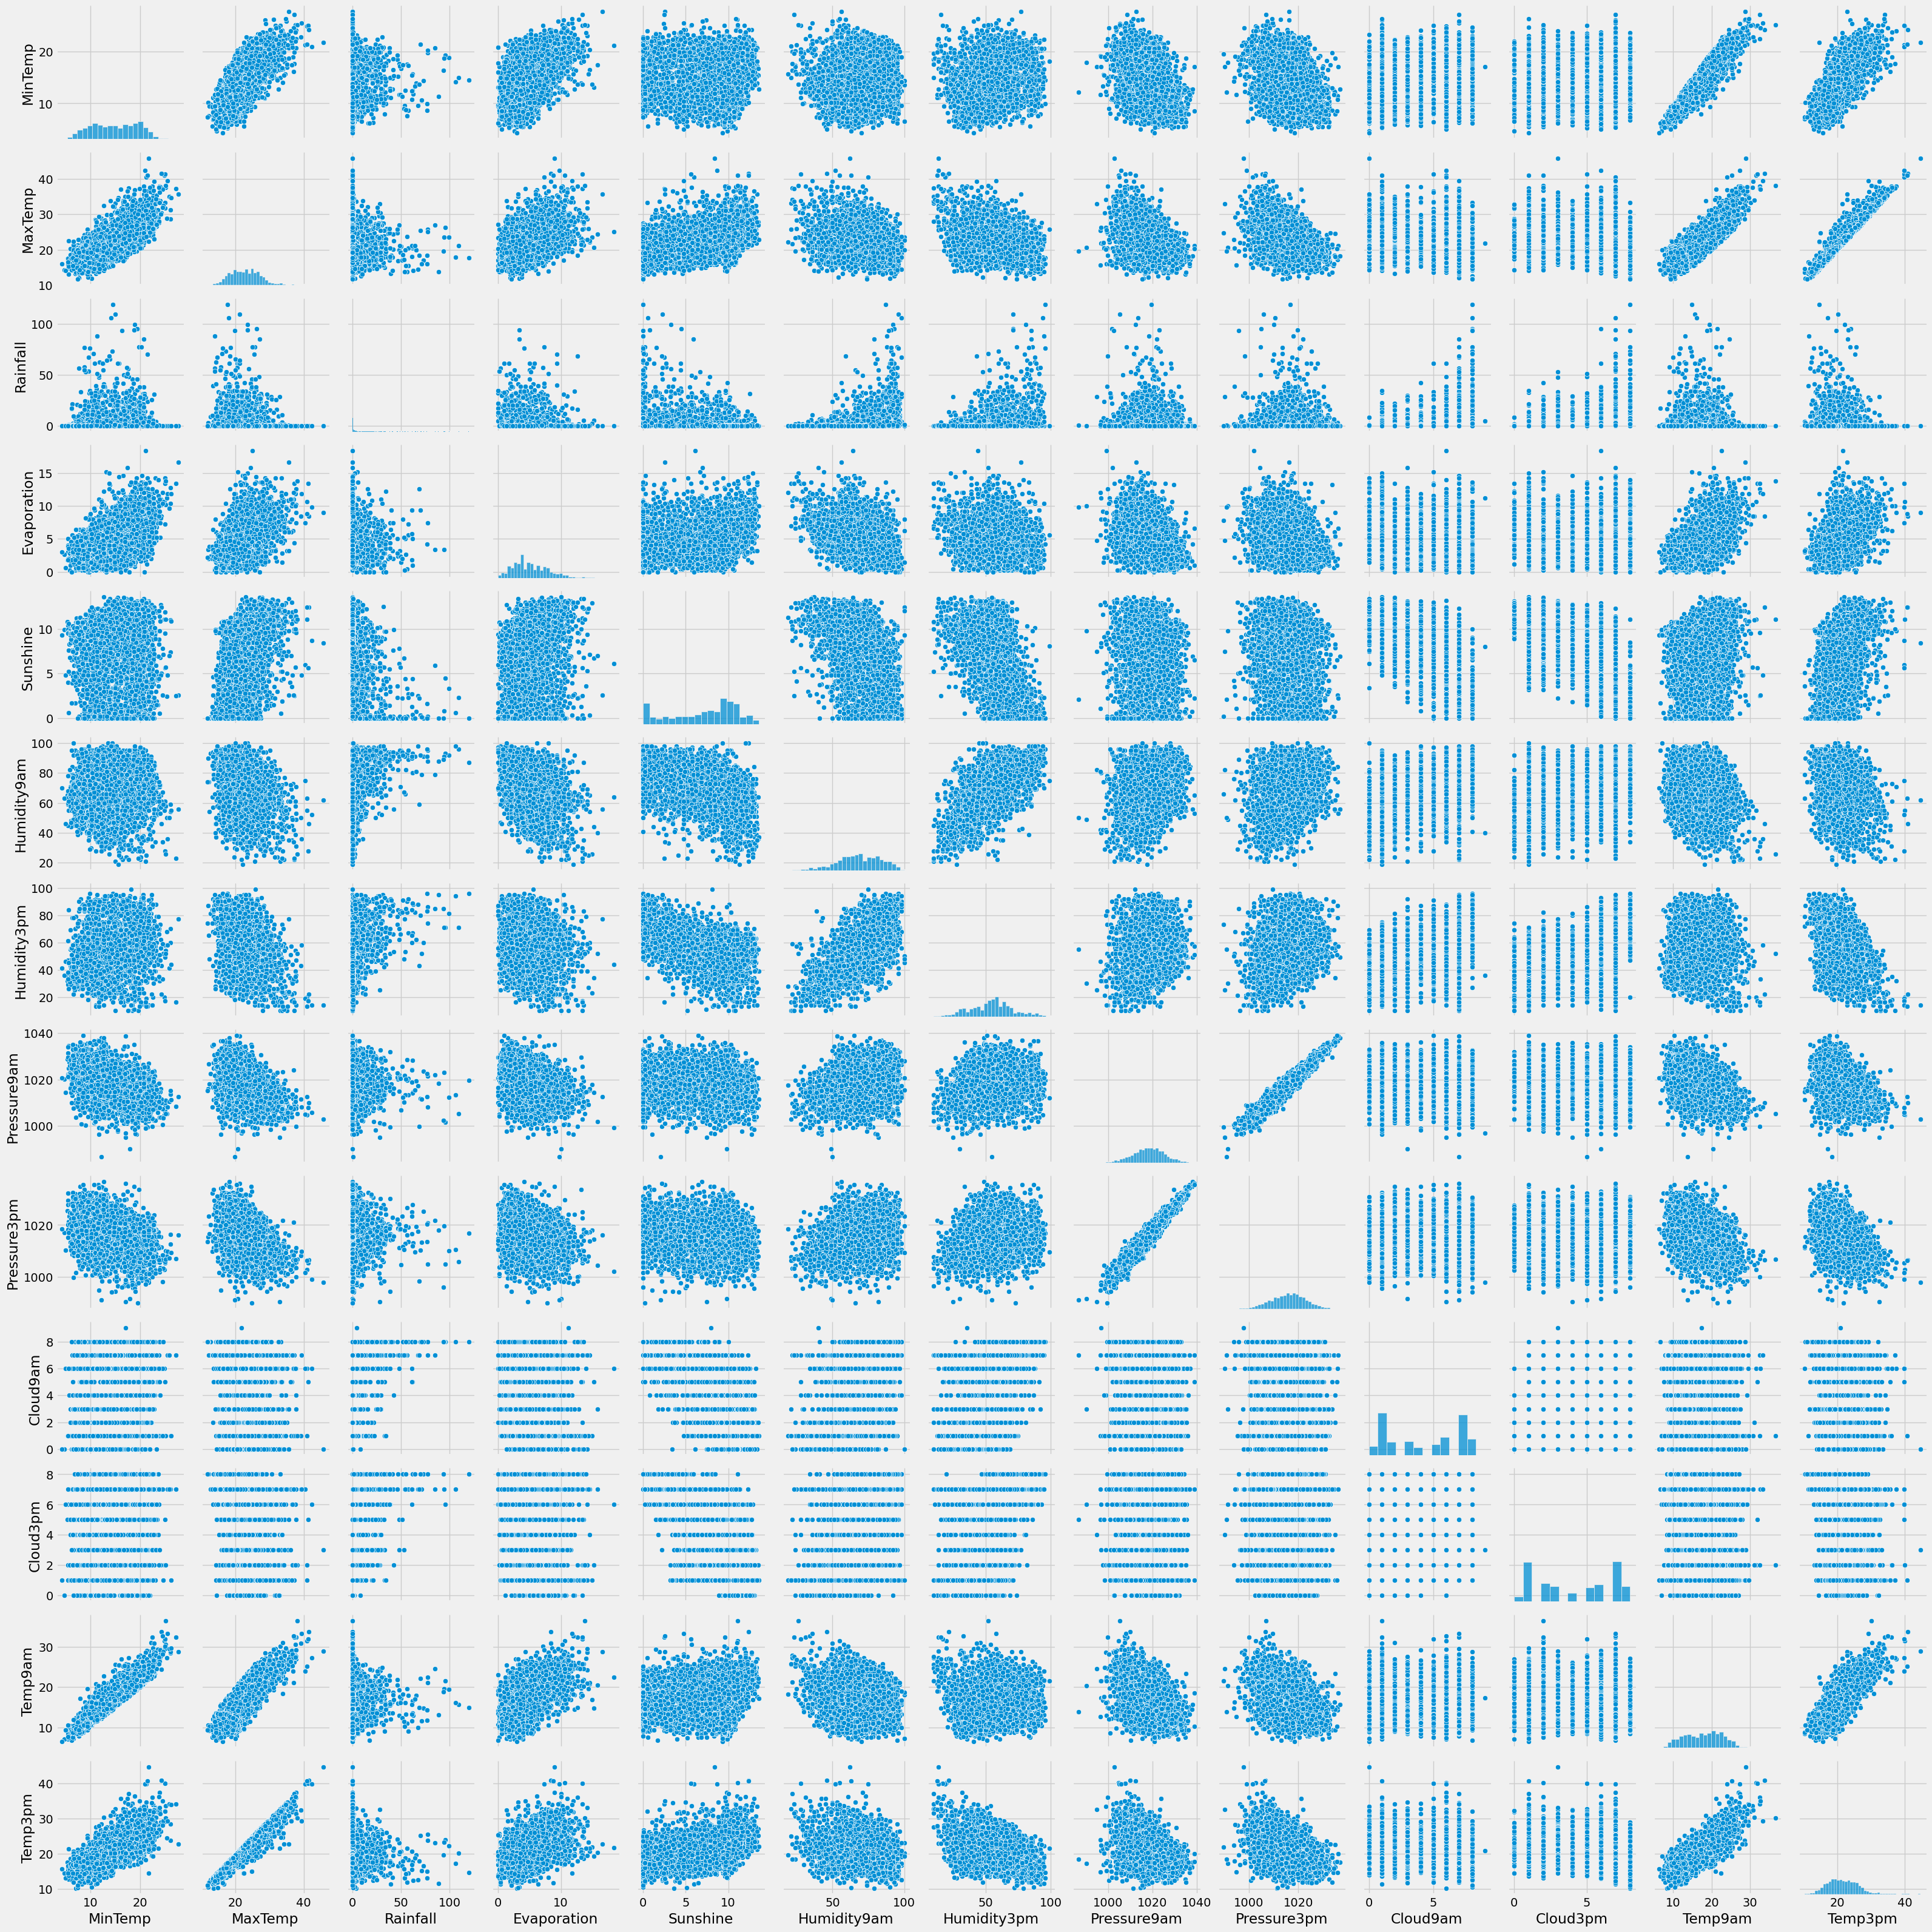

In [18]:
#TO SEE THE CORRELATION AMONG DIFFERENT VARIABLES. 

sns.pairplot(data=df, x_vars=df.columns.tolist()[:13], y_vars=df.columns.tolist()[:13])

#### REMOVING NOISE (OUTLIERS)

In [19]:
df_temp = df.copy()

#NORMALLY DISTRIBUTED FEATUES
LIST1 = ['MinTemp', 'MaxTemp',  'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am','Temp3pm'] 

#SKEWED FEATURES
LIST2 = ['Rainfall' , 'Evaporation', 'Sunshine', 'Humidity9am', 'Cloud9am', 'Cloud3pm']

# BY USING Z-SCORE TECHNIQUE 
for i in LIST1:
    upper_limit = df[i].mean() + 3*df[i].std()
    lower_limit = df[i].mean() - 3*df[i].std()
    df[i] = np.where(
        df[i]>upper_limit,
        upper_limit,
        np.where(
            df[i]<lower_limit,
            lower_limit,
            df[i]
        )
    )

# #BY USING IRQ TECHNIQUE
for i in LIST2:
    percentile25 = df[i].quantile(0.25)
    percentile75 = df[i].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    
    
    df[i] = np.where(
        df[i] > upper_limit,
        upper_limit,
        np.where(
            df[i] < lower_limit,
            lower_limit,
            df[i]
        )
    )


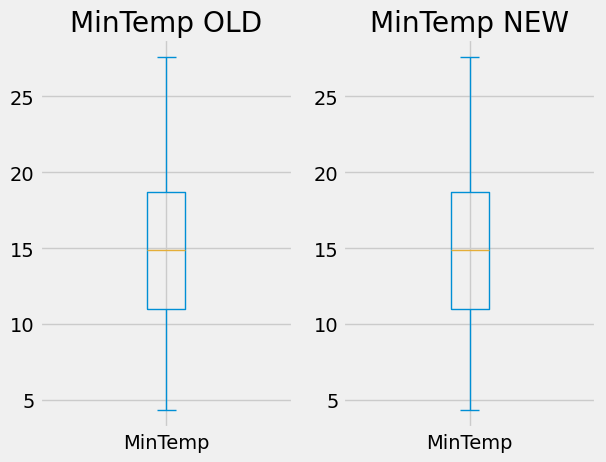

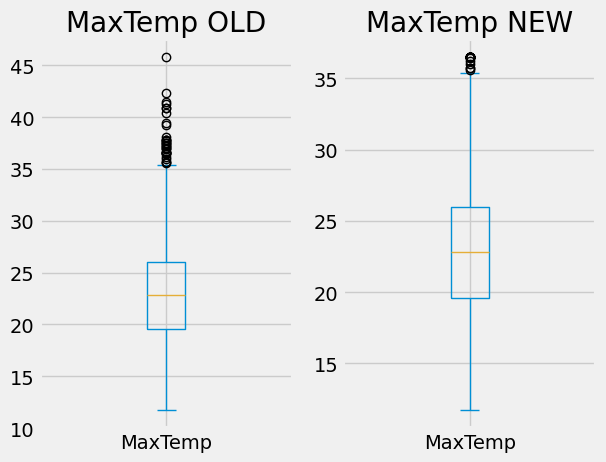

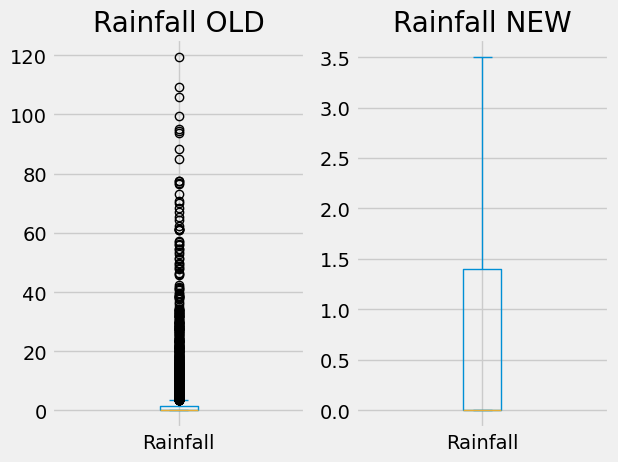

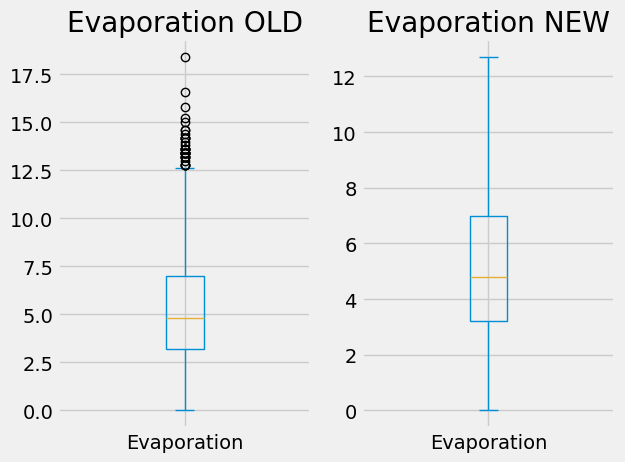

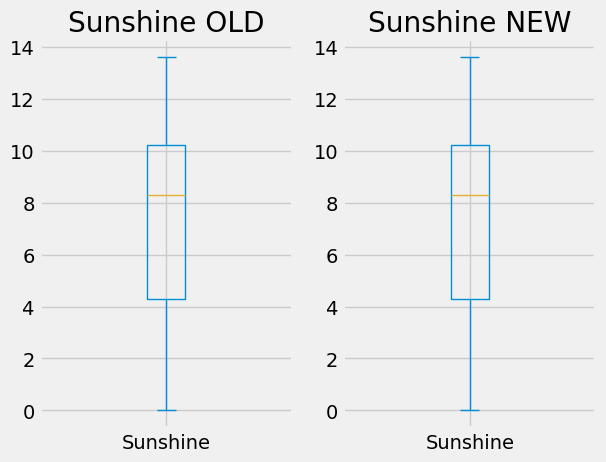

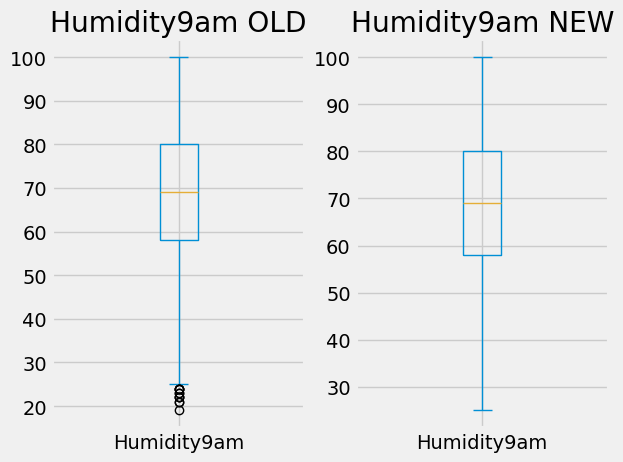

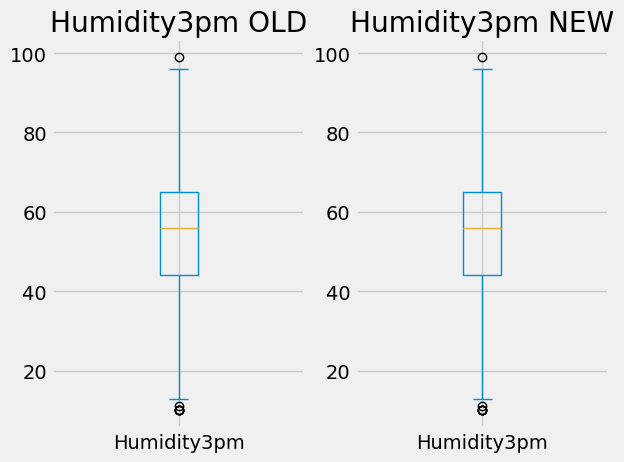

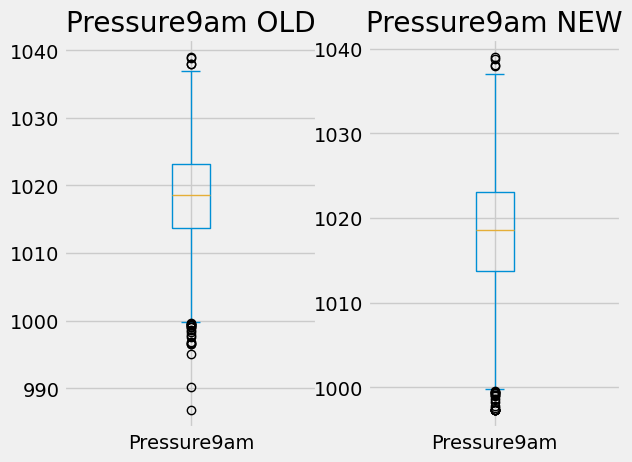

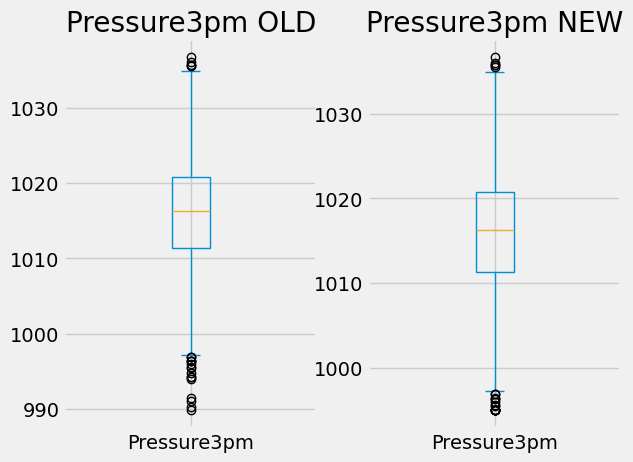

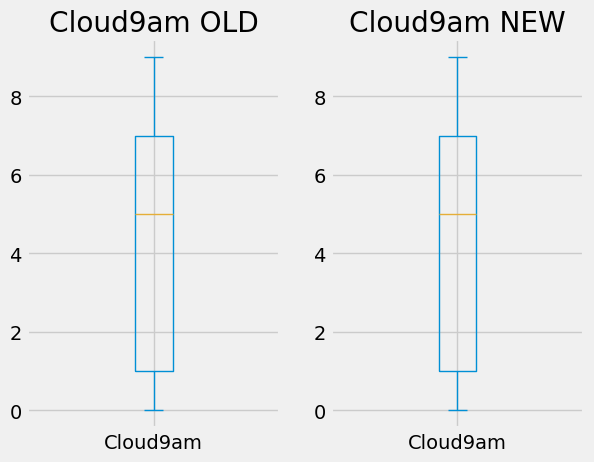

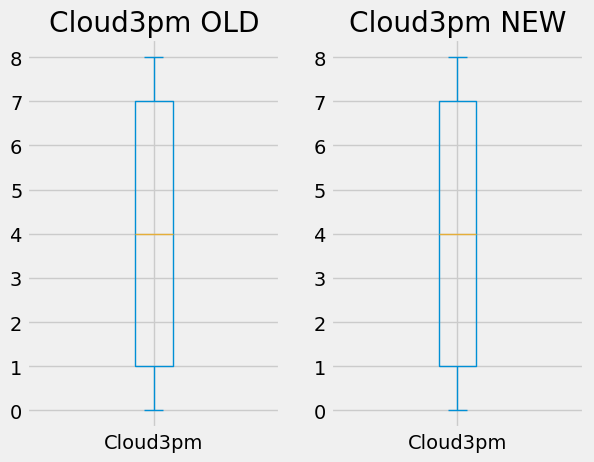

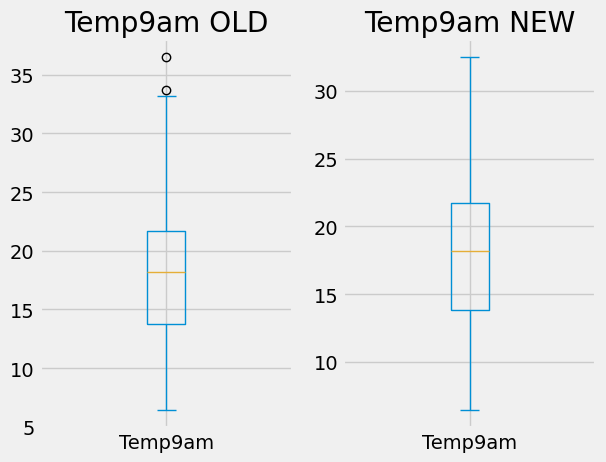

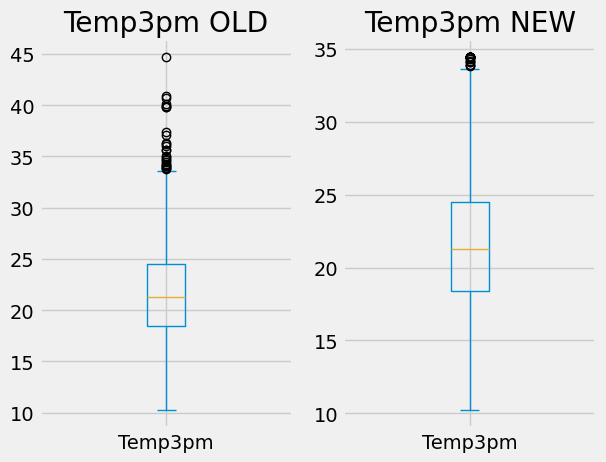

In [20]:
plt.style.use('fivethirtyeight')
for i in df.columns.tolist()[:13]:
    fig=plt.figure()
    ax=fig.add_subplot(121)
    df_temp[i].plot(kind='box', title=i+' OLD')

    ax=fig.add_subplot(122)
    df[i].plot(kind='box', title=i+' NEW')
 

#### SEGREGATING THE DATA INTO X(INDEPENDENT) AND Y(DEPENDENT) VARIABLE which subjected to be predicted

In [21]:
X=df.drop(columns=['RainTomorrow_Yes'])

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        3334 non-null   float64
 1   MaxTemp        3335 non-null   float64
 2   Rainfall       3331 non-null   float64
 3   Evaporation    3286 non-null   float64
 4   Sunshine       3321 non-null   float64
 5   Humidity9am    3323 non-null   float64
 6   Humidity3pm    3324 non-null   float64
 7   Pressure9am    3317 non-null   float64
 8   Pressure3pm    3318 non-null   float64
 9   Cloud9am       2771 non-null   float64
 10  Cloud3pm       2776 non-null   float64
 11  Temp9am        3333 non-null   float64
 12  Temp3pm        3333 non-null   float64
 13  year           3337 non-null   int32  
 14  day_of_year    3337 non-null   int32  
 15  date_week      3337 non-null   UInt32 
 16  RainToday_Yes  3337 non-null   int32  
dtypes: UInt32(1), float64(13), int32(3)
memory usage: 39

In [23]:
y=df['RainTomorrow_Yes']

In [24]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3337 entries, 0 to 3336
Series name: RainTomorrow_Yes
Non-Null Count  Dtype
--------------  -----
3337 non-null   int32
dtypes: int32(1)
memory usage: 13.2 KB


#### TRAIN TEST SPLIT TO EVALUATE MODEL'S PERFORMANCE ON TEST DATA

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [26]:
#DATA IS SPLIT INTO 20:80 RATIO
X_train.shape, X_test.shape

((2669, 17), (668, 17))

In [27]:
X_train.isnull().sum()

MinTemp            2
MaxTemp            1
Rainfall           6
Evaporation       34
Sunshine          13
Humidity9am       12
Humidity3pm       11
Pressure9am       18
Pressure3pm       15
Cloud9am         454
Cloud3pm         450
Temp9am            4
Temp3pm            2
year               0
day_of_year        0
date_week          0
RainToday_Yes      0
dtype: int64

In [28]:
X_test.isnull().sum()

MinTemp            1
MaxTemp            1
Rainfall           0
Evaporation       17
Sunshine           3
Humidity9am        2
Humidity3pm        2
Pressure9am        2
Pressure3pm        4
Cloud9am         112
Cloud3pm         111
Temp9am            0
Temp3pm            2
year               0
day_of_year        0
date_week          0
RainToday_Yes      0
dtype: int64

#### FEATURE TRANSFORMATION

In [29]:
#POWER TRANSFORMER IS USED TO CONVERT A DISTRIBUTION INTO NORMAL DISTRIBUTION

pt=PowerTransformer()

X_train[['Rainfall','Sunshine','Cloud9am','Cloud3pm','Evaporation']]=pt.fit_transform(X_train[['Rainfall', 'Sunshine','Cloud9am','Cloud3pm','Evaporation']])

X_test[['Rainfall','Sunshine','Cloud9am','Cloud3pm','Evaporation']]=pt.fit_transform(X_test[['Rainfall', 'Sunshine','Cloud9am','Cloud3pm','Evaporation']])

#### MISSING VALUE IMPUTATION

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        3334 non-null   float64
 1   MaxTemp        3335 non-null   float64
 2   Rainfall       3331 non-null   float64
 3   Evaporation    3286 non-null   float64
 4   Sunshine       3321 non-null   float64
 5   Humidity9am    3323 non-null   float64
 6   Humidity3pm    3324 non-null   float64
 7   Pressure9am    3317 non-null   float64
 8   Pressure3pm    3318 non-null   float64
 9   Cloud9am       2771 non-null   float64
 10  Cloud3pm       2776 non-null   float64
 11  Temp9am        3333 non-null   float64
 12  Temp3pm        3333 non-null   float64
 13  year           3337 non-null   int32  
 14  day_of_year    3337 non-null   int32  
 15  date_week      3337 non-null   UInt32 
 16  RainToday_Yes  3337 non-null   int32  
dtypes: UInt32(1), float64(13), int32(3)
memory usage: 39

In [31]:
#COLUMN TRANFORMER IS USED TO PERFORM THE IMPUTATION OPERATION 
#KNN IMPUTER IS USED FOR CLOUD COLUMNS AS IT HAS THE MOST NO. OF MISSING VALUES WHICH NEEDS TO BE HANDLED CORRECTLY 
#SIMPLE IMPUTER USES MEAN/MEDIAN/MOSE(MOST_FREQUENT) TO TREATE MISSING VALUES 
#DEFAULT VALUE OF SIMPLE IMPUTER IS MEAN
#IMPUTER1 USES SIMPLE IMPUTER WITH MEAN
#IMPUTER2 USES KNN IMPUTER WITH 50 NEIGHBOURS (BI-VARIATE IMPUTATION)
#AS CLOUD COLUMNS HAS HIGHEST NO. OF MISSING DATA THUS, TO TRAIN THE MODEL ON MISSING DATA AN ADDITION INDICATOR COLUMN IS ADDED

imputer1=SimpleImputer() 
imputer2=KNNImputer(n_neighbors=50, add_indicator=True)    



trf = ColumnTransformer([('col_0_8', imputer1, slice(0,9)),
                         ('col_9_10', imputer2, [9,10]),  
                         ('col_11_12', imputer1, [11,12])
],remainder='passthrough' )

trf.fit(X_train)
X_train=trf.transform(X_train)
X_test=trf.transform(X_test)

In [32]:
#VIEWING THE DATA SAMPLE AFTER FEATURE ENGINEERING

pd.DataFrame(X_train).sample(10)

0     1         2         3         4     5     6       7       8   \
2435  19.6  25.4 -0.733478  1.306162  0.415647  65.0  61.0  1015.8  1012.7   
2236  15.0  18.7  0.467524 -0.939561 -1.799535  50.0  49.0  1032.5  1030.7   
2094  12.6  15.6  1.621471 -1.141372 -1.760985  83.0  90.0  1036.7  1034.1   
2388  12.0  24.8  0.467524 -1.141372 -0.587966  80.0  51.0  1023.9  1020.0   
1567  20.5  24.2 -0.733478  1.196559 -1.487725  58.0  54.0  1017.5  1016.9   
1948   8.7  18.0  1.497845 -2.145019 -0.587966  88.0  64.0  1023.5  1022.4   
2060  11.9  17.3 -0.733478 -1.473512 -1.760985  79.0  69.0  1026.2  1023.5   
901    8.9  15.9  1.621471 -1.720309 -1.211446  84.0  71.0  1033.5  1031.6   
1924  18.9  33.2 -0.733478  0.540594 -0.378015  63.0  29.0  1009.7  1003.5   
659   20.7  24.5  1.621471 -1.038755 -1.799535  84.0  91.0  1014.3  1013.0   

            9         10   11   12    13    14    15   16  17 18  
2435  0.702515  0.032401  0.0  0.0  24.0  23.9  2012  311  45  0  
2236  1.290018  1.030213  0.0  0.0  17.4  18.5  2014  294  43  0  
2094  1.003074  1.030213  0.0  0.0  14.4  14.6  2010  174  25  1  
2388 -0.314877  1.030213  0.0  0.0  14.5  21.4  2014  130  19  0  
1567  1.003074  1.030213  0.0  0.0  21.6  23.5  2008   56   9  0  
1948 -0.314877   0.38523  0.0  0.0  10.5  16.4  2016  191  27  1  
2060  1.003074  1.030213  0.0  0.0  13.3  17.2  2017  167  24  0  
901   1.003074  0.716444  0.0  0.0  10.3  14.8  2013  191  28  1  
1924  0.385587  1.030213  0.0  0.0  21.7  31.2  2012  272  39  0  
659       -0.0      -0.0  1.0  1.0  23.7  22.7  2012   25   4  1

#### SCALING THE DATA

In [33]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

## FEATURE EXTRACTION

#### EVALUATING DIFFENT MODEL'S PERFORMANCE FOR DIFFERNT SET OF FEATURES 

In [34]:
#CHECKING THE PERFORMANCE OF DIFFERENT MODEL FOR DIFFERNT SET OF PRINCIPAL FEATURES. 
#PRINCIPAL FEATURES ARE DICIDED USING PCA(PRINCIPAL COMPONENT ANALYSIS) METHOD WHICH MAINLY USES EIGEN VALUE AND EIGEN VECTORS 
#WITH ONLY 11 IMPORTANT FEATURES ACCURACY HAS INCREASED TO SOME EXTEND
#IT WILL HELP US TO SAVE A LOT OF SAVE AND SAVE OUR SERVER FOR HEAVY COMPUTATION 
#SINCE WE GET MORE ACCURACY USING LESS NO. OF FEATURES RATHER THAN USING ALL THE FEATURES. 

for i in range(3,17):
    pca = PCA(n_components=i)
    
    pca.fit(X_train)
    
    X_train_t = pca.transform(X_train)
    X_test_t = pca.transform(X_test)
    
    accuracy_test = {}
    models = {
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Ada Boosting Classifier" : AdaBoostClassifier(),
    "XG Boost Classifier" : XGBClassifier()
    }

    print(f" No of Features: {i}")
    for model_name, model in models.items():
        
        model.fit(X_train_t, y_train)

        y_test_pred = model.predict(X_test_t)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        accuracy_test[model_name] = test_accuracy
            
        
        print(f"{model_name} - Test Accuracy: {test_accuracy:.4f}")

    best_model_accuracy = max(accuracy_test, key=accuracy_test.get)
    print(f"Model with highest test accuracy: {best_model_accuracy} ({accuracy_test[best_model_accuracy]:.4f})")
    print("\n")        
        

 No of Features: 3
Logistic Regression - Test Accuracy: 0.8114
Decision Tree Classifier - Test Accuracy: 0.7410
Random Forest Classifier - Test Accuracy: 0.8219
Gradient Boosting Classifier - Test Accuracy: 0.8114
Ada Boosting Classifier - Test Accuracy: 0.8084
XG Boost Classifier - Test Accuracy: 0.8009
Model with highest test accuracy: Random Forest Classifier (0.8219)


 No of Features: 4
Logistic Regression - Test Accuracy: 0.8114
Decision Tree Classifier - Test Accuracy: 0.7440
Random Forest Classifier - Test Accuracy: 0.8219
Gradient Boosting Classifier - Test Accuracy: 0.8189
Ada Boosting Classifier - Test Accuracy: 0.8144
XG Boost Classifier - Test Accuracy: 0.8054
Model with highest test accuracy: Random Forest Classifier (0.8219)


 No of Features: 5
Logistic Regression - Test Accuracy: 0.8114
Decision Tree Classifier - Test Accuracy: 0.7455
Random Forest Classifier - Test Accuracy: 0.8174
Gradient Boosting Classifier - Test Accuracy: 0.8189
Ada Boosting Classifier - Test Acc

#### SELECTED BEST FEATURES 

In [35]:
#SELECTING 11 BEST FEATURES

pca = PCA(n_components=11)
    
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [36]:
#FIRST FIVE ROWS OF OUR SELECTED FEATURES 

pd.DataFrame(X_train).head()

0         1         2         3         4         5         6   \
0 -0.074003  0.395269 -0.433482 -1.161936 -0.915667 -0.890865 -0.694907   
1 -1.291241  2.154656 -0.775880 -0.864351  1.739977  1.059274 -1.078328   
2 -2.100863 -0.789450  2.090021  2.321807 -1.018601 -0.172326 -0.576280   
3  2.355242  1.661746  3.197621  0.947057 -0.495056 -0.365622 -0.026048   
4  1.129796 -2.816371 -0.512761  0.602713  0.181148 -0.112563  0.812493   

         7         8         9         10  
0  0.459618  1.913296  0.112798  0.085679  
1  1.467037  0.661772 -0.913249 -0.569054  
2  0.263663  0.360353 -0.160165  0.350287  
3  0.584357 -0.734294 -0.137935  0.674429  
4 -1.337365 -0.110719 -0.419001 -0.947308

# MODEL SELECTION

In [37]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear'),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Ada Boosting Classifier" : AdaBoostClassifier(),
    "XG Boost Classifier" : XGBClassifier()
}

# Dictionaries to store the metrics
accuracy_train = {}
accuracy_test = {}
conf_matrices_train = {}
conf_matrices_test = {}
precision_scores_train = {}
precision_scores_test = {}
recall_scores_train = {}
recall_scores_test = {}

for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict on training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    

    # Calculate metrics for training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    

    # Calculate metrics for testing data
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
 
    # Store the metrics in the dictionaries
    accuracy_train[model_name] = train_accuracy
    accuracy_test[model_name] = test_accuracy
    conf_matrices_train[model_name] = train_conf_matrix
    conf_matrices_test[model_name] = test_conf_matrix
    precision_scores_train[model_name] = train_precision
    precision_scores_test[model_name] = test_precision
    recall_scores_train[model_name] = train_recall
    recall_scores_test[model_name] = test_recall
 

    # Print the metrics with a space after each model's performance
    print(f"{model_name} - Train Accuracy: {train_accuracy:.4f}")
    print(f"{model_name} - Test Accuracy: {test_accuracy:.4f}")
    print(f"{model_name} - Train Confusion Matrix:\n{train_conf_matrix}")
    print(f"{model_name} - Test Confusion Matrix:\n{test_conf_matrix}")
    print(f"{model_name} - Train Precision: {train_precision:.4f}")
    print(f"{model_name} - Test Precision: {test_precision:.4f}")
    print(f"{model_name} - Train Recall: {train_recall:.4f}")
    print(f"{model_name} - Test Recall: {test_recall:.4f}")
    print("\n")

# Find the model with the highest metrics
best_model_accuracy = max(accuracy_test, key=accuracy_test.get)
best_model_precision = max(precision_scores_test, key=precision_scores_test.get)
best_model_recall = max(recall_scores_test, key=recall_scores_test.get)

print(f"Model with highest test accuracy: {best_model_accuracy} ({accuracy_test[best_model_accuracy]:.4f})")
print(f"Model with highest test precision: {best_model_precision} ({precision_scores_test[best_model_precision]:.4f})")
print(f"Model with highest test recall: {best_model_recall} ({recall_scores_test[best_model_recall]:.4f})")


Logistic Regression - Train Accuracy: 0.8396
Logistic Regression - Test Accuracy: 0.8174
Logistic Regression - Train Confusion Matrix:
[[1864  124]
 [ 304  377]]
Logistic Regression - Test Confusion Matrix:
[[448  36]
 [ 86  98]]
Logistic Regression - Train Precision: 0.8324
Logistic Regression - Test Precision: 0.8093
Logistic Regression - Train Recall: 0.8396
Logistic Regression - Test Recall: 0.8174


Decision Tree Classifier - Train Accuracy: 1.0000
Decision Tree Classifier - Test Accuracy: 0.7635
Decision Tree Classifier - Train Confusion Matrix:
[[1988    0]
 [   0  681]]
Decision Tree Classifier - Test Confusion Matrix:
[[400  84]
 [ 74 110]]
Decision Tree Classifier - Train Precision: 1.0000
Decision Tree Classifier - Test Precision: 0.7676
Decision Tree Classifier - Train Recall: 1.0000
Decision Tree Classifier - Test Recall: 0.7635


Random Forest Classifier - Train Accuracy: 1.0000
Random Forest Classifier - Test Accuracy: 0.8308
Random Forest Classifier - Train Confusion Ma

#### CROSS VALIDATING THE RESULT FOR CV=10

In [38]:
#CROSS VALIDATING THE SCORE OF BEST ESTIMATOR TO BY CALCULATING THE MEAN OF ITS 17 RANDOM SCORE

from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()

best_score=max(cross_val_score(rf,X_test,y_test,scoring='accuracy', cv=17).tolist())
low_score=min(cross_val_score(rf,X_test,y_test,scoring='accuracy', cv=17).tolist())
print(f'Highest Accuracy: {best_score}') 
print("\n")
print(f'Lowest Accuracy: {low_score}')
print("\n")
               
mean_score=np.mean(cross_val_score(rf,X_test,y_test,scoring='accuracy', cv=17)) 
print(f'Average Accuracy: {mean_score}') 

Highest Accuracy: 0.8717948717948718


Lowest Accuracy: 0.6923076923076923


Average Accuracy: 0.7978883861236803


#### HYPARAMETER TUNING FOR SELECTED MODEL

In [39]:
param ={'n_estimators':[100,500,1000],
        'max_depth' : [None,30],
        'min_samples_split': [2,3],
        'min_samples_leaf': [1,2], 
}
gscv = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param, scoring='accuracy', n_jobs=-1, verbose=5 )

gscv.fit(X_train, y_train)
                   

#BEST MODEL SELECTED 

estimator=gscv.best_estimator_

#HYPERPARAMETERS OF THE BEST MODEL
print(gscv.best_params_)

#ACCURACY OF THE BEST MODEL
print(accuracy_score(y_test, estimator.predict(X_test)))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
0.8308383233532934


# QUESTION ANSWERS 

<h2>1. Your views about the problem statement?</h2>
<p>The problem statement involves predicting rainfall in Sydney using various classification models, with a focus on ensemble methods. This is a typical classification problem in machine learning where historical weather data is used to make predictions. The task is well-defined and relevant, given the importance of accurate weather predictions for planning and safety. Using ensemble methods like Random Forest is a smart choice as they generally provide better accuracy by combining the strengths of multiple models.</p>

<h2>2. What will be your approach to solving this task?</h2>
<p>The approach to solving this task would include the following steps:</p>
<ol>
    <li><strong>Data Preprocessing:</strong>
        <ul>
            <li>Handle missing values using methods like Simple Imputer and KNN Imputer.</li>
            <li>Treat outliers using methods like Z-score and IQR.</li>
            <li>Transform data using techniques like Yeo-Johnson transformation.</li>
            <li>Scale the features using Standard Scaler.</li>
            <li>Encode categorical variables using One-Hot Encoding.</li>
            <li>Extract important features from datetime data.</li>
            <li>Select the best features using PCA.</li>
        </ul>
    </li>
    <li><strong>Model Training:</strong>
        <ul>
            <li>Split the data into training and testing sets.</li>
            <li>Train various classification models, focusing on ensemble methods like Random Forest, Bagging, and Boosting techniques.</li>
            <li>Evaluate each model using cross-validation scores and performance metrics like accuracy and confusion matrix.</li>
        </ul>
    </li>
    <li><strong>Model Selection and Hyperparameter Tuning:</strong>
        <ul>
            <li>Select the model with the best performance, in this case, Random Forest.</li>
            <li>Optimize the model using Grid Search CV to find the best hyperparameters.</li>
        </ul>
    </li>
    <li><strong>Model Evaluation:</strong>
        <ul>
            <li>Assess the final model using various performance metrics.</li>
            <li>Analyze feature importance and the model's predictions to ensure it meets the required accuracy.</li>
        </ul>
    </li>
</ol>

<h2>3. What were the available ML model options you had to perform this task?</h2>
<p>The available ML model options include:</p>
<ul>
    <li><strong>Logistic Regression:</strong> A linear model that predicts the probability of a binary outcome.</li>
    <li><strong>Decision Tree Classifier:</strong> A model that splits the data into subsets based on the most significant input features.</li>
    <li><strong>Random Forest Classifier:</strong> An ensemble method that combines multiple decision trees to reduce overfitting and improve accuracy.</li>
    <li><strong>Gradient Boosting Classifier:</strong> An ensemble method that builds models sequentially, each correcting errors from the previous model.</li>
    <li><strong>Ada Boosting Classifier:</strong> An ensemble method that combines multiple weak classifiers to create a strong classifier by focusing on hard-to-classify instances.</li>
    <li><strong>XG Boost Classifier:</strong> An optimized gradient boosting algorithm that improves performance and speed.</li>
</ul>

<h2>4. Which model’s performance is best and what could be the possible reason for that?</h2>
<p>The Random Forest Classifier was selected as the best-performing model. The possible reasons for its superior performance include:</p>
<ul>
    <li><strong>Ensemble Nature:</strong> Random Forest combines multiple decision trees, which helps to reduce overfitting and improves generalization.</li>
    <li><strong>Bootstrap Aggregating (Bagging):</strong> It creates multiple subsets of the data, builds trees on them, and averages the results, which reduces variance.</li>
    <li><strong>Feature Importance:</strong> Random Forest can handle large datasets with higher dimensionality and provides insights into feature importance.</li>
    <li><strong>Robustness:</strong> It is less sensitive to noisy data and outliers compared to single decision trees.</li>
</ul>

<h2>5. What steps can you take to improve this selected model’s performance even further?</h2>
<p>To improve the performance of the Random Forest Classifier further, the following steps can be taken:</p>
<ol>
    <li><strong>Feature Engineering:</strong> Create new features based on domain knowledge or interaction terms.</li>
    <li><strong>Advanced Hyperparameter Tuning:</strong> Use techniques like Randomized Search CV or Bayesian Optimization for more efficient hyperparameter tuning.</li>
    <li><strong>Ensemble of Ensembles:</strong> Combine Random Forest with other models (like Gradient Boosting) in a stacked ensemble.</li>
    <li><strong>More Data:</strong> Collect more data, if possible, to train the model better.</li>
    <li><strong>Model Regularization:</strong> Apply regularization techniques to penalize overly complex models.</li>
    <li><strong>Cross-Validation Strategies:</strong> Use more robust cross-validation techniques, such as Stratified K-Fold, to ensure the model's performance is consistent across different data splits.</li>
</ol>


# THANK YOU VERY MUCH 

# BEST ACCURACY OF THE MODEL - 0.87179